In [85]:
import numpy as np

In [4]:
files_names=[
"Anza_04apr2020_ce23287p"
,"borregosprings_10jun2016_37374687_ce23287p"
,"Banning_11Jan2010_CE23287P"
,"cabazon_08may2018_38167848_ce23287p"
,"Beaumont_16Jan2010_CE23287P"
,"calexico_04apr2010_14607652_CE23287P"
,"BigBearLake_05Jul2014_15520985_ce23287p"
,"chinohills_29jul2008_ce23287p"
,"BorregoSprings_07Jul2010_CE23287P"
,"devore_28apr2012_15141521_ce23287p"
,"devore_29dec2015_37507576_ce23287p"
,"Inglewood_17May2009_CE23287P"
,"fontana_15jan2014_11413954_ce23287p"
,"LittleLake_06jul2019_ce23287p"
,"fontana_25jul2015_37213455_ce23287p"
,"LomaLinda_09may2021_ce23287p"
,"lahabra_28mar2014_15481673_ce23287p"
,"LomaLinda_16nov2020_ce23287p"
,"landers92_ce23287p"
,"LomaLinda_30jan2019_ce23287p"
,"laverne_28aug2018_38038071_ce23287p"
,"Ocotillo_14Jun2010_CE23287P"
,"lomalinda_04mar2013_15293905_ce23287p"
,"Redlands_13Feb2010_CE23287P"
,"lomalinda_08oct2016_37713424_ce23287p"
,"Redlands_31dec2021_ce23287p"
,"lomalinda_13mar2017_37828544_ce23287p"
,"Ridgecrest_04jul2019_ce23287p"
,"lomalinda_23jun2008_ce23287p"
,"Ridgecrest_06jul2019_ce23287p"
,"lomalinda_26feb2013_11249474_ce23287p"
,"SanBernardino_08Jan2009_CE23287P"
,"northridge_17jan1994_ce23287p"
,"SearlesValley_04jun2020_ce23287p"
,"ontario_20dec2011_15088052_ce23287p"
,"Trona_06jul2019_ce23287p"
,"trabucocanyon_25jan2018_38092312_ce23287p"
,"banning_06jan2016_37510616_ce23287p"
,"yorbalinda_07aug2012_15189073_ce23287p"
,"beaumont_14sep2011_11006189_ce23287p"
]

In [5]:
major_folder_path_1 = '/content/drive/MyDrive/NYUAD-Courses/Deep Learning/Project/Data/San Bernardino - 6 - story Hotel/Files Extracted Filtered Moded 001'
major_folder_path_2 = '/content/drive/MyDrive/NYUAD-Courses/Deep Learning/Project/Data/San Bernardino - 6 - story Hotel/Files Extracted Filtered Moded 002'

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
def find_line_index(lines, search_string):
    try:
        for index, line in enumerate(lines):
            if search_string in line:
                return index
        return -1
    except FileNotFoundError:
        return -1

In [36]:
def find_word_index(words, target_word):
    try:
        index = words.index(target_word)
        return index
    except ValueError:
        return -1

In [70]:
def extract_txt_after(line,word1,word2=None):
  words = line.split()
  index = find_word_index(words, word1)
  if (index <0) & (word2!=None):
    index = find_word_index(words, word2)
  value = words[index+1]
  return value

In [72]:
def extract_values_between_range(lines,start_index,last_index_not_included):
  all_numbers = []
  for i in range(start_index, last_index_not_included):
    numbers_as_strings = lines[i].split()
    numbers = [float(number) for number in numbers_as_strings]
    all_numbers.extend(numbers)

  return   all_numbers

In [158]:
class FileData:
  def __init__(self,name,acc_index,vel_index,dsp_index,lst_index,dt_acc,dt_vel,dt_dsp,unit_acc,unit_vel,unit_dsp,acc_values,vel_values,dsp_values,dt_sampling,acc_values_sampled,vel_values_sampled,dsp_values_sampled):
    self.name = name
    self.acc_index = acc_index
    self.vel_index = vel_index
    self.dsp_index = dsp_index
    self.lst_index = lst_index
    self.dt_acc = dt_acc
    self.dt_vel = dt_vel
    self.dt_dsp = dt_dsp
    self.unit_acc = unit_acc
    self.unit_vel = unit_vel
    self.unit_dsp = unit_dsp
    self.acc_values = acc_values
    self.vel_values = vel_values
    self.dsp_values = dsp_values
    self.dt_sampling = dt_sampling
    self.acc_values_sampled = acc_values_sampled
    self.vel_values_sampled = vel_values_sampled
    self.dsp_values_sampled = dsp_values_sampled
    self.ID = 0

In [117]:
def reconstruct_a_signal(input_signal,input_dt,output_dt):
    input_fs=1/input_dt
    N_input=len(input_signal)
    T_total=input_dt*(N_input-1)
    t_input=np.arange(0,T_total+input_dt,input_dt) #times for sinc pulses

    output_signal=0 #initialzize reconstructed signal to 0
    Br=input_fs/2  #reconstrunction bandwidth in Hz Br <= fs/2

    t_output=np.arange(min(t_input),max(t_input)+output_dt,output_dt) #times for sinc pulses

    for n in range(N_input):
        output_signal=output_signal+input_signal[n]*input_dt*2.0*Br*np.sinc(2*Br*(t_output-n*input_dt)); #reconstructed signal at nth sample

    return output_signal,t_output,t_input

In [125]:
import numpy as np
import matplotlib.pyplot as plt
def plot_series(y):
  plt.rcParams["figure.figsize"] = [15, 3.50]
  plt.rcParams["figure.autolayout"] = True
  # plt.title("Line graph")
  plt.plot(y, color="red")
  plt.show()

In [155]:
import pickle
import numpy as np

def save_object_with_pickle(file_path,file_name,data):
    with open(f'{file_path}/{file_name}.pickle', 'wb') as f:
        # Pickle the 'data' dictionary using the highest protocol available.
        pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)


def load_object_with_pickle(file_path,file_name):
    with open(f'{file_path}/{file_name}.pickle', 'rb') as f:
        data = pickle.load(f)
        return data

In [147]:
def ReadData000(name,input_file, output_file):
    try:
        # Read the content from the input file
        with open(input_file, 'r') as file:
            lines = file.readlines()

            acc_index = find_line_index(lines, 'points of accel data equally spaced at')
            vel_index = find_line_index(lines, 'points of veloc data equally spaced at')
            dsp_index = find_line_index(lines, 'points of displ data equally spaced at')
            lst_index = find_line_index(lines, 'End of data for channel')

            dt_acc = float(extract_txt_after(lines[acc_index],'at'))
            dt_vel = float(extract_txt_after(lines[vel_index],'at'))
            dt_dsp = float(extract_txt_after(lines[dsp_index],'at'))

            unit_acc = extract_txt_after(lines[acc_index],'in','(UNITS:')
            unit_vel = extract_txt_after(lines[vel_index],'in','(UNITS:')
            unit_dsp = extract_txt_after(lines[dsp_index],'in','(UNITS:')

            acc_values = extract_values_between_range(lines,acc_index+1,vel_index)
            vel_values = extract_values_between_range(lines,vel_index+1,dsp_index)
            dsp_values = extract_values_between_range(lines,dsp_index+1,lst_index)

            acc_values = np.asarray(acc_values, dtype=np.float32)
            vel_values = np.asarray(vel_values, dtype=np.float32)
            dsp_values = np.asarray(dsp_values, dtype=np.float32)

            dt_sampling = 0.005
            acc_values_sampled,_,_= reconstruct_a_signal(acc_values, dt_acc ,dt_sampling)
            vel_values_sampled,_,_= reconstruct_a_signal(vel_values, dt_vel ,dt_sampling)
            dsp_values_sampled,_,_= reconstruct_a_signal(dsp_values, dt_dsp ,dt_sampling)

            print(f'{acc_index:5.0F},{vel_index:5.0F},{dsp_index:5.0F},{lst_index:5.0F} #{dt_acc:7.4F},{dt_vel:7.4F},{dt_dsp:7.4F} # {unit_acc}, {unit_vel}, {unit_dsp} # {acc_values.shape[0]:7.0F} , {acc_values_sampled.shape[0]:7.0F}')
            if acc_index<0:
              print(input_file)

            return FileData(name,acc_index,vel_index,dsp_index,lst_index,dt_acc,dt_vel,dt_dsp,unit_acc,unit_vel,unit_dsp,acc_values,vel_values,dsp_values,dt_sampling,acc_values_sampled,vel_values_sampled,dsp_values_sampled)

    except FileNotFoundError:
        print(f"Error: File '{input_file}' not found.")


In [148]:
file_name = files_names[18] ## files_names[3]
input_file_path = f'{major_folder_path_1}/{file_name}_M001.V2'
output_file_path = f'{major_folder_path_2}/{file_name}_M001.V2'
file_data = ReadData000(file_name,input_file_path, output_file_path)

   45,  546, 1047, 1548 # 0.0200, 0.0200, 0.0200 # cm/sec2., cm/sec., cm. #    4000 ,   15997


In [149]:
print(file_data.acc_values.shape)
print(file_data.acc_values_sampled.shape)

(4000,)
(15997,)


In [150]:
file_data.dt_sampling

0.005

In [151]:
file_data.dt_acc

0.02

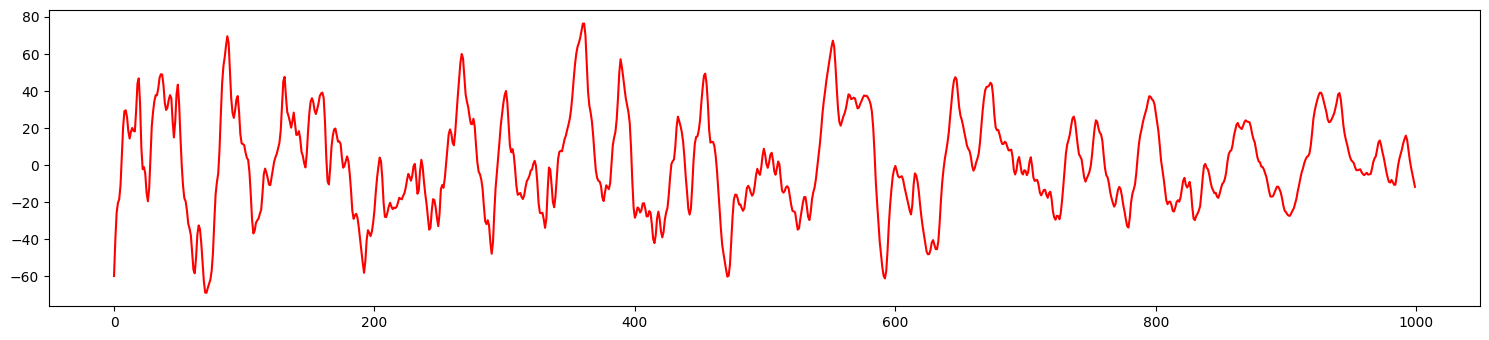

In [152]:
plot_series(file_data.acc_values[1000:2000])

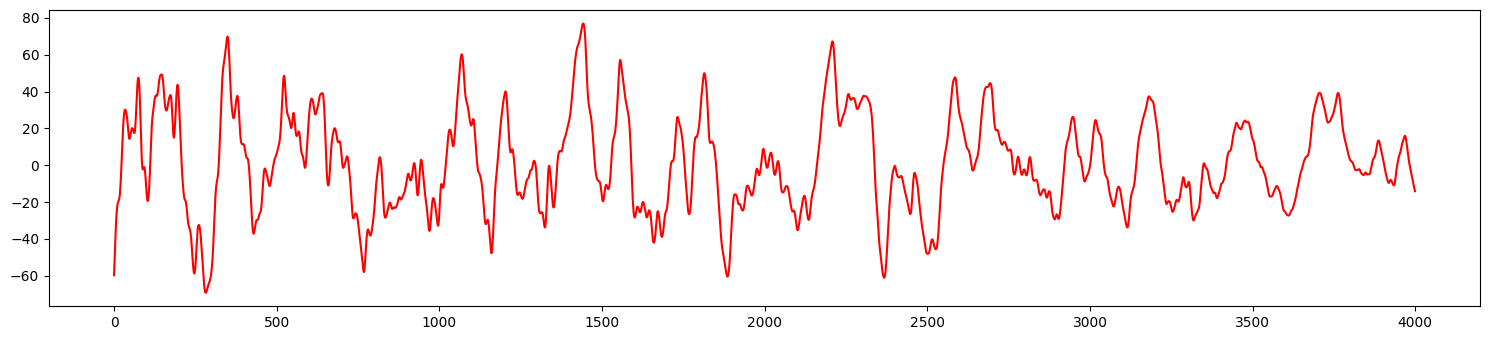

In [153]:
plot_series(file_data.acc_values_sampled[4000:8000])

In [159]:
files_data = []
ID = 0
for file_name in files_names:
  input_file_path = f'{major_folder_path_1}/{file_name}_M001.V2'
  output_file_path = f'{major_folder_path_2}/{file_name}_M001.V2'
  file_data = ReadData000(file_name,input_file_path, output_file_path)
  ID += 1
  file_data.ID = ID
  files_data.append(file_data)

   45, 1596, 3147, 4698 # 0.0050, 0.0050, 0.0050 # cm/sec2., cm/sec., cm. #   12400 ,   12401
   45, 1546, 3047, 4548 # 0.0050, 0.0050, 0.0050 # cm/sec2., cm/sec., cm. #   12000 ,   12001
   45, 1446, 2847, 4248 # 0.0050, 0.0050, 0.0050 # cm/sec2., cm/sec., cm. #   11200 ,   11201
   45,  946, 1847, 2748 # 0.0100, 0.0100, 0.0100 # cm/sec2., cm/sec., cm. #    7200 ,   14399
   45, 1446, 2847, 4248 # 0.0050, 0.0050, 0.0050 # cm/sec2., cm/sec., cm. #   11200 ,   11201
   45, 1121, 2197, 3273 # 0.0100, 0.0100, 0.0100 # cm/sec2., cm/sec., cm. #    8600 ,   17199
   45, 1546, 3047, 4548 # 0.0050, 0.0050, 0.0050 # cm/sec2., cm/sec., cm. #   12000 ,   12001
   45, 1071, 2097, 3123 # 0.0100, 0.0100, 0.0100 # cm/sec2., cm/sec., cm. #    8200 ,   16399
   45,  946, 1847, 2748 # 0.0100, 0.0100, 0.0100 # cm/sec2., cm/sec., cm. #    7200 ,   14399
   45, 1546, 3047, 4548 # 0.0050, 0.0050, 0.0050 # cm/sec2., cm/sec., cm. #   12000 ,   12001
   45, 1546, 3047, 4548 # 0.0050, 0.0050, 0.0050 # cm/sec2.,

In [160]:
save_object_with_pickle(major_folder_path_2,'all_eq_processed_data_ID',files_data)